In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [3]:
data_26 = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/alk_OAE_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 100))

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [4]:
data_70 = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/DIC&alk_OAE_7.0_cropped.nc', decode_times=True).sel(deptht=slice(0, 100))

### EU Seasonal Average of Alkalinity

In [5]:
data_26 = data_26.where(data_26)
data_70 = data_70.where(data_70)

In [6]:
sliced_frame_26 = data_26.sel(time_counter=slice('2090', '2100'))

In [7]:
sliced_frame_70 = data_70.sel(time_counter=slice('2090', '2100'))

In [8]:
data_26_plot = data_26.ALK.mean(dim=('y', 'x', 'deptht'))
data_70_plot = data_70.ALK.mean(dim=('y', 'x', 'deptht'))

In [9]:
data_26_plot = data_26_plot.to_dataset()
data_70_plot = data_70_plot.to_dataset()

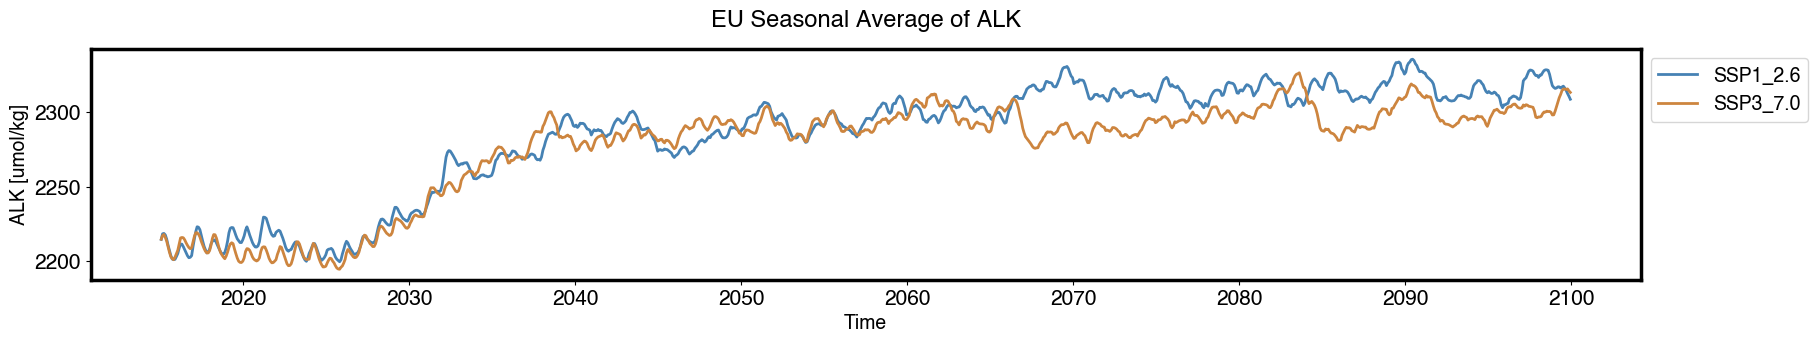

In [10]:
plt.figure(figsize=(20, 3))
plt.plot(data_26_plot.time_counter, data_26_plot.ALK, linewidth=2, label = 'SSP1_2.6', color="steelblue")
plt.plot(data_70_plot.time_counter, data_70_plot.ALK, linewidth=2, label = 'SSP3_7.0', color="peru")
plt.xlabel("Time", fontsize=14)
plt.ylabel("ALK [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of Alkalinity', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [11]:
sliced_frame_26_plot = sliced_frame_26.ALK.mean(dim=('y', 'x', 'deptht'))
sliced_frame_70_plot = sliced_frame_70.ALK.mean(dim=('y', 'x', 'deptht'))

In [12]:
sliced_frame_26_plot = sliced_frame_26_plot.to_dataset()
sliced_frame_70_plot = sliced_frame_70_plot.to_dataset()

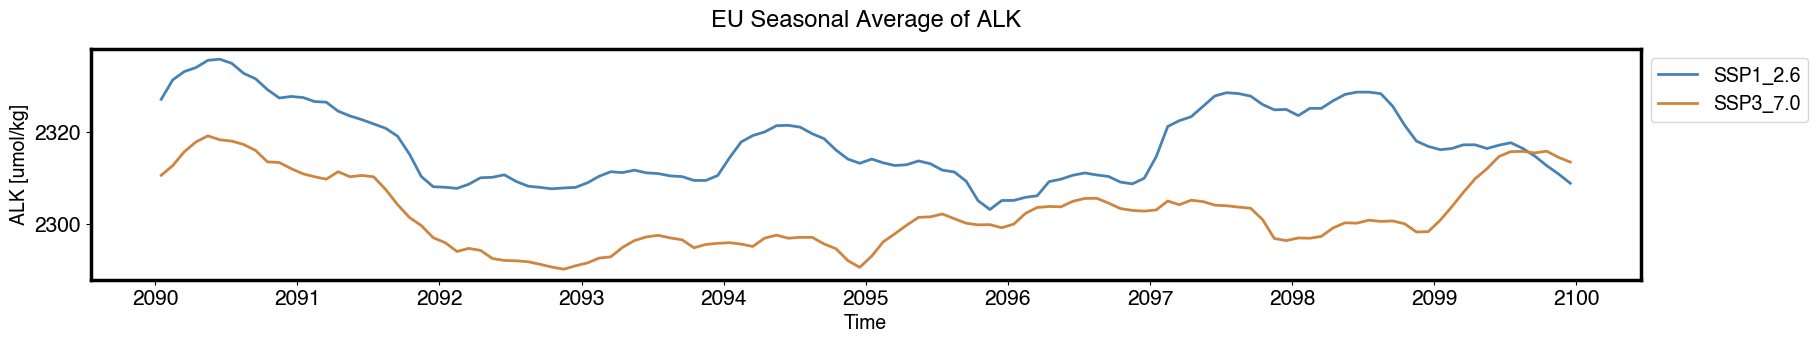

In [13]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_26_plot.time_counter, sliced_frame_26_plot.ALK, linewidth=2, label = 'SSP1_2.6', color="steelblue")
plt.plot(sliced_frame_70_plot.time_counter, sliced_frame_70_plot.ALK, linewidth=2, label = 'SSP3_7.0', color="peru")
plt.xlabel("Time", fontsize=14)
plt.ylabel("ALK [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of Alkalinity', fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of Alkalinity

In [14]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_26 = data_26["ALK"].sel(time_counter=slice(start_date, end_date))

In [15]:
alk_season_summary_26 = alk_26.groupby('time_counter.season').mean('time_counter', skipna=True)
alk_season_mean_all_years_26 = alk_26.resample(time_counter='QS-DEC').mean(keep_attrs=True)
alk_seasonal_mean_26 = alk_season_mean_all_years_26.groupby('time_counter').mean(["y", "x", "deptht"])

In [16]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_70 = data_70["ALK"].sel(time_counter=slice(start_date, end_date))

In [17]:
alk_season_summary_70 = alk_70.groupby('time_counter.season').mean('time_counter', skipna=True)
alk_season_mean_all_years_70 = alk_70.resample(time_counter='QS-DEC').mean(keep_attrs=True)
alk_seasonal_mean_70 = alk_season_mean_all_years_70.groupby('time_counter').mean(["y", "x", "deptht"])

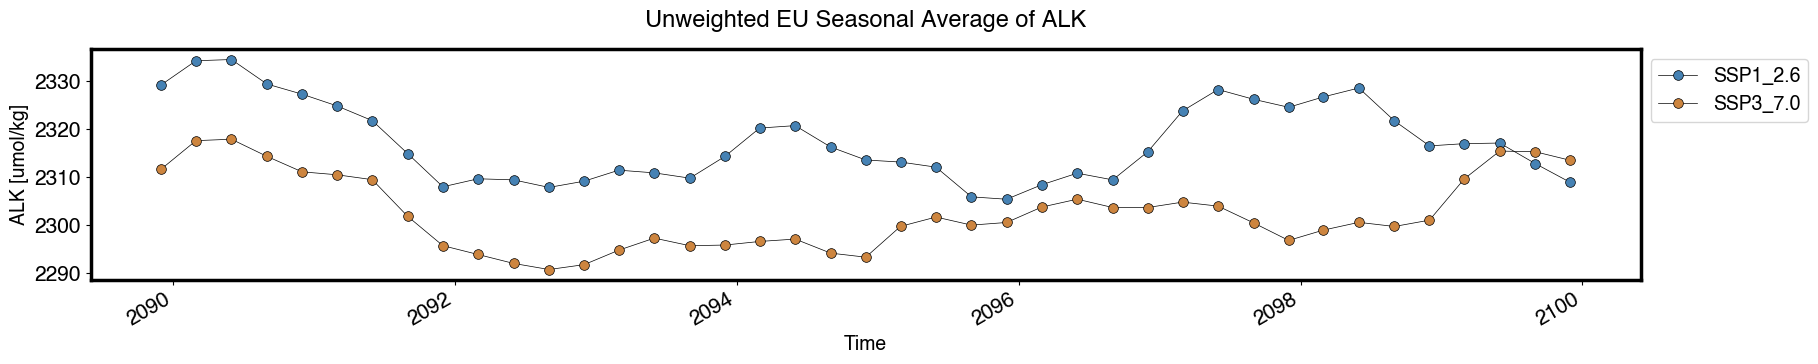

In [18]:
f, ax = plt.subplots(figsize=(20, 3))

alk_seasonal_mean_26.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="steelblue", 
                        markeredgecolor="black", 
                        label = 'SSP1_2.6')

alk_seasonal_mean_70.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="peru",
                        markeredgecolor="black", 
                        label = 'SSP3_7.0')
ax.set_title("Unweighted EU Seasonal Average of Alkalinity", fontsize= 17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("ALK [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of Alkalinity

In [19]:
month_length_26 = alk_26.time_counter.dt.days_in_month
alk_weighted_mean_26 = ((alk_26 * month_length_26).resample(time_counter='QS-DEC').sum() / month_length_26.resample(time_counter='QS-DEC').sum())
alk_weighted_mean_26 = alk_weighted_mean_26.where(alk_weighted_mean_26)
alk_weighted_season_26 = alk_weighted_mean_26.groupby('time_counter').mean(["y", "x", "deptht"])

In [20]:
month_length_70 = alk_70.time_counter.dt.days_in_month
alk_weighted_mean_70 = ((alk_70 * month_length_70).resample(time_counter='QS-DEC').sum() / month_length_70.resample(time_counter='QS-DEC').sum())
alk_weighted_mean_70 = alk_weighted_mean_70.where(alk_weighted_mean_70)
alk_weighted_season_70 = alk_weighted_mean_70.groupby('time_counter').mean(["y", "x", "deptht"])

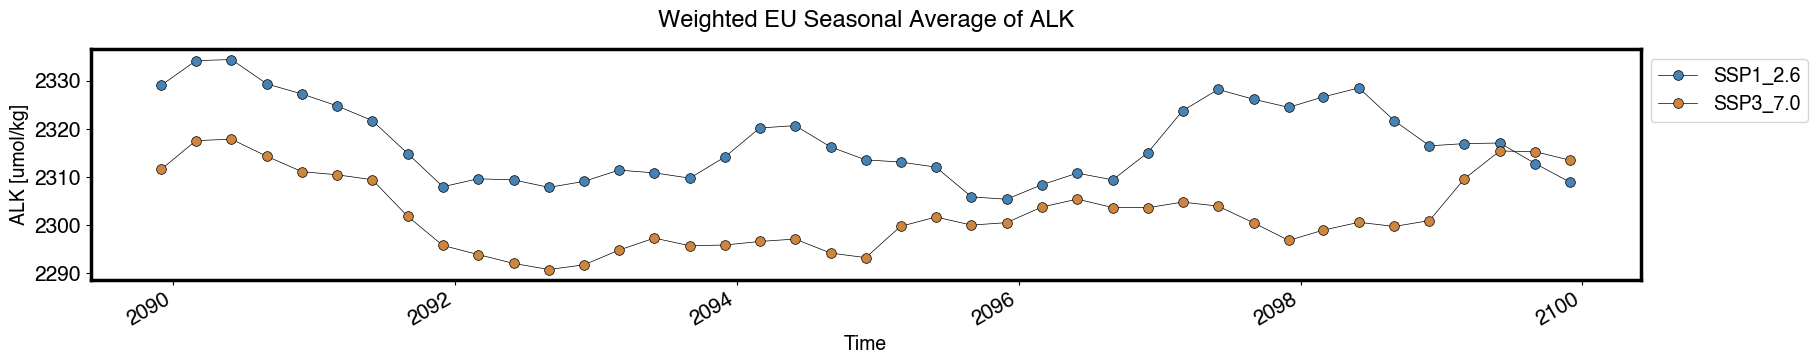

In [21]:
colors = {3: "peru", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
alk_weighted_season_26.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="steelblue",
                        markeredgecolor="black", 
                        label = 'SSP1_2.6')

alk_weighted_season_70.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="peru",
                        markeredgecolor="black", 
                        label = 'SSP3_7.0')
ax.set_title("Weighted EU Seasonal Average of Alkalinity", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("ALK [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of Alkalinity (seasons displayed)

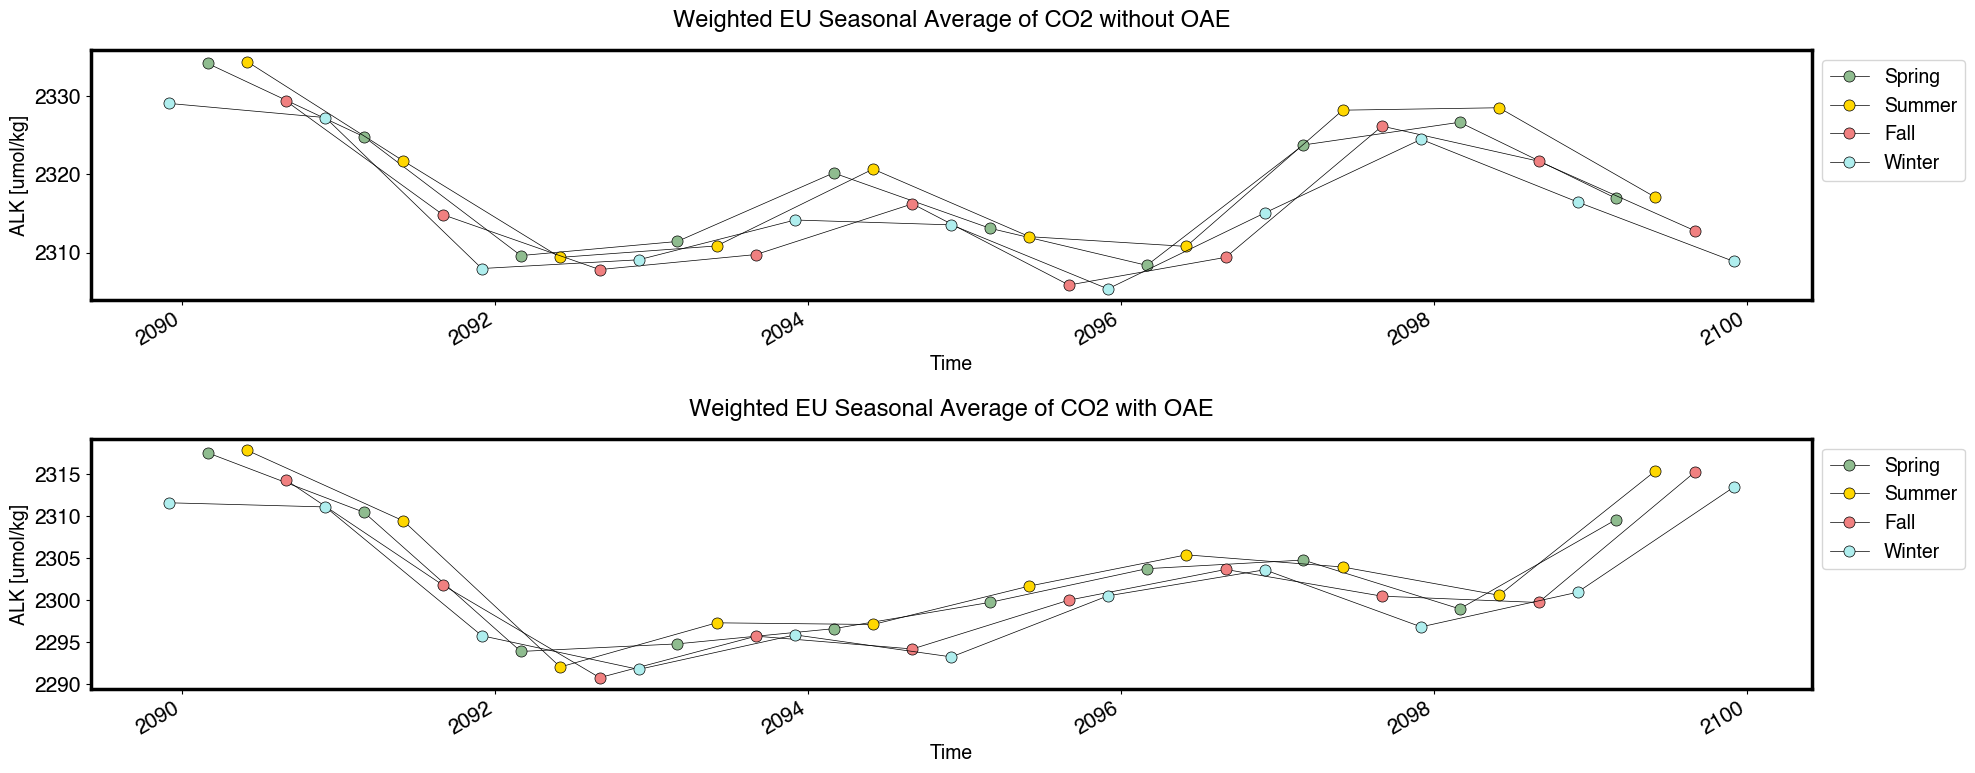

In [22]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in alk_weighted_season_26.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of CO2 without OAE", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('ALK [umol/kg]', fontsize=14)

for month, arr in alk_weighted_season_70.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of CO2 with OAE", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('ALK [umol/kg]', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of Alkalinity without OAE (seasons displayed)

In [23]:
alk_weighted_26 = alk_weighted_season_26.to_dataframe('ALK')
alk_weighted_26['Month'] = pd.DatetimeIndex(alk_weighted_26.index).month

In [24]:
conditions = [
    (alk_weighted_26['Month'] == 3),
    (alk_weighted_26['Month'] == 6),
    (alk_weighted_26['Month'] == 9),
    (alk_weighted_26['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

alk_weighted_26['Month'] = np.select(conditions, values)

In [25]:
colors = dict(zip(alk_weighted_26.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

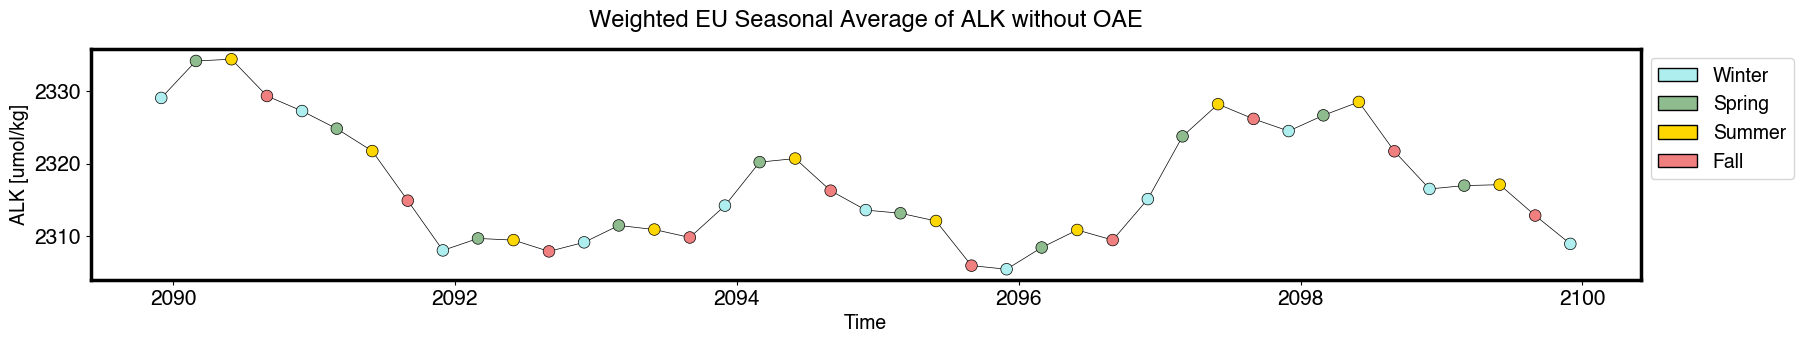

In [26]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_weighted_26.index, alk_weighted_26.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_weighted_26.index, alk_weighted_26.ALK, color=alk_weighted_26.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('ALK [umol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity without OAE", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of Alkalinity with OAE (seasons displayed)

In [27]:
alk_weighted_70 = alk_weighted_season_70.to_dataframe('ALK')
alk_weighted_70['Month'] = pd.DatetimeIndex(alk_weighted_70.index).month

In [28]:
conditions = [
    (alk_weighted_70['Month'] == 3),
    (alk_weighted_70['Month'] == 6),
    (alk_weighted_70['Month'] == 9),
    (alk_weighted_70['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

alk_weighted_70['Month'] = np.select(conditions, values)

In [29]:
colors = dict(zip(alk_weighted_70.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

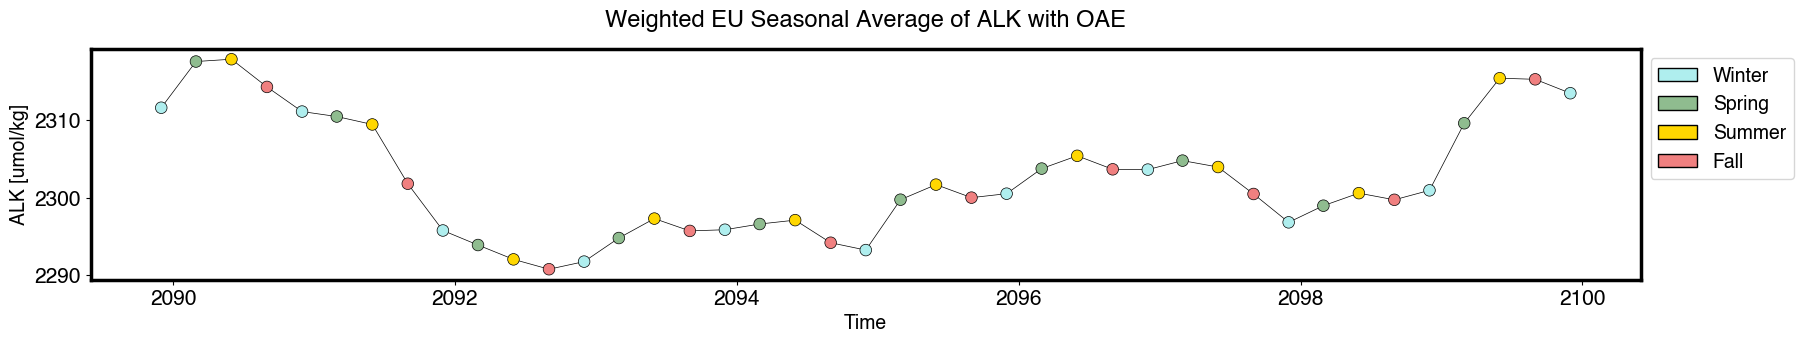

In [30]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_weighted_70.index, alk_weighted_70.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_weighted_70.index, alk_weighted_70.ALK, color=alk_weighted_70.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('ALK [umol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity with OAE", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of Alkalinity (seasons displayed)

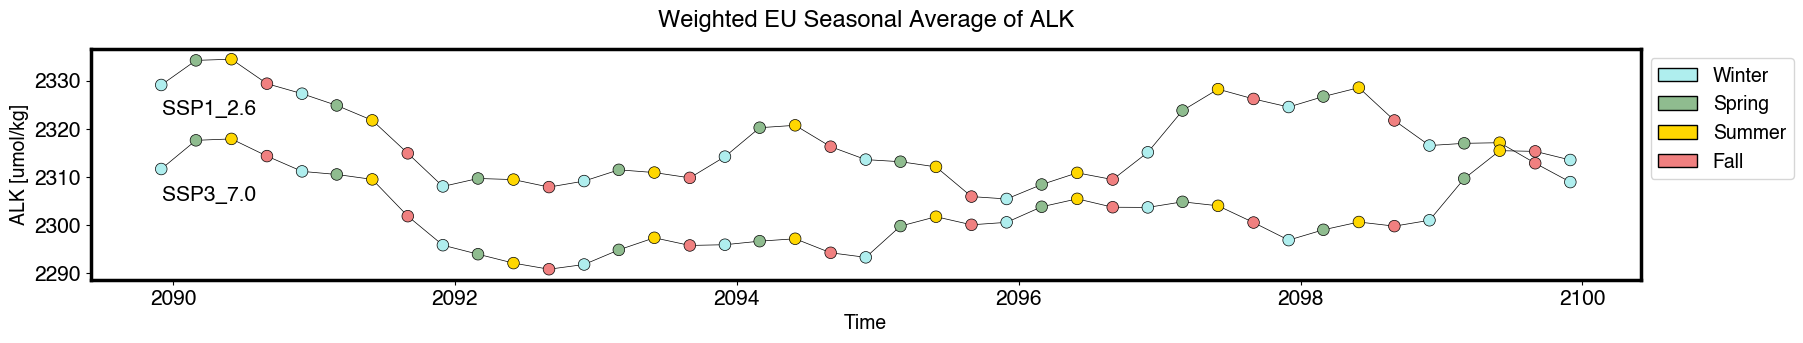

In [35]:
colors = dict(zip(alk_weighted_26.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(alk_weighted_26.index, alk_weighted_26.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 2305, s='SSP3_7.0')
ax.scatter(alk_weighted_26.index, alk_weighted_26.ALK, color=alk_weighted_26.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(alk_weighted_70.index, alk_weighted_70.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 2323, s='SSP1_2.6')
ax.scatter(alk_weighted_70.index, alk_weighted_70.ALK, color=alk_weighted_70.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('ALK [umol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity", fontsize=17, y=1.06)

#plt.savefig('EUalk_seasonal_mean.png')

pass

### EU Monthly Averaged Alkalinity for the last 10 years

In [36]:
mean_26 = (sliced_frame_26.ALK.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_26 = mean_26.groupby(mean_26.index.month).ALK.mean()
mean_26 = mean_26.reset_index()
mean_26['time_counter'] = mean_26['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_26 = mean_26.set_index('time_counter')

In [37]:
mean_70 = (sliced_frame_70.ALK.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_70 = mean_70.groupby(mean_70.index.month).ALK.mean()
mean_70 = mean_70.reset_index()
mean_70['time_counter']= mean_70['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_70 = mean_70.set_index('time_counter')

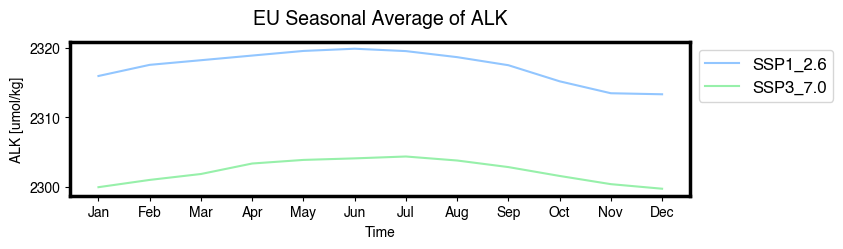

In [38]:
plt.figure(figsize=(8,2))
plt.plot(mean_26.ALK, label='SSP1_2.6')
plt.plot(mean_70.ALK, label='SSP3_7.0')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.xlabel("Time", fontsize=10)
plt.ylabel("ALK [umol/kg]", fontsize=10)
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.title('EU Seasonal Average of Alkalinity', fontname="Helvetica", fontsize=14, y=1.06)
plt.show()

### EU Seasonal Average of Alkalinity from 2090 to 2100 without OAE

In [39]:
sliced_frame_26 = sliced_frame_26.ALK.mean(dim=('deptht'))

In [40]:
month_length = sliced_frame_26.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_26 = (sliced_frame_26 * weights).groupby("time_counter.season").sum(dim="time_counter")

In [41]:
ds_unweighted_26 = sliced_frame_26.groupby("time_counter.season").mean("time_counter")
ds_diff_26 = ds_weighted_26 - ds_unweighted_26

In [42]:
ds_weighted_26 = ds_weighted_26.to_dataset(name='ALK')
ds_unweighted_26 = ds_unweighted_26.to_dataset(name='ALK')
ds_diff_26 = ds_diff_26.to_dataset(name='ALK')

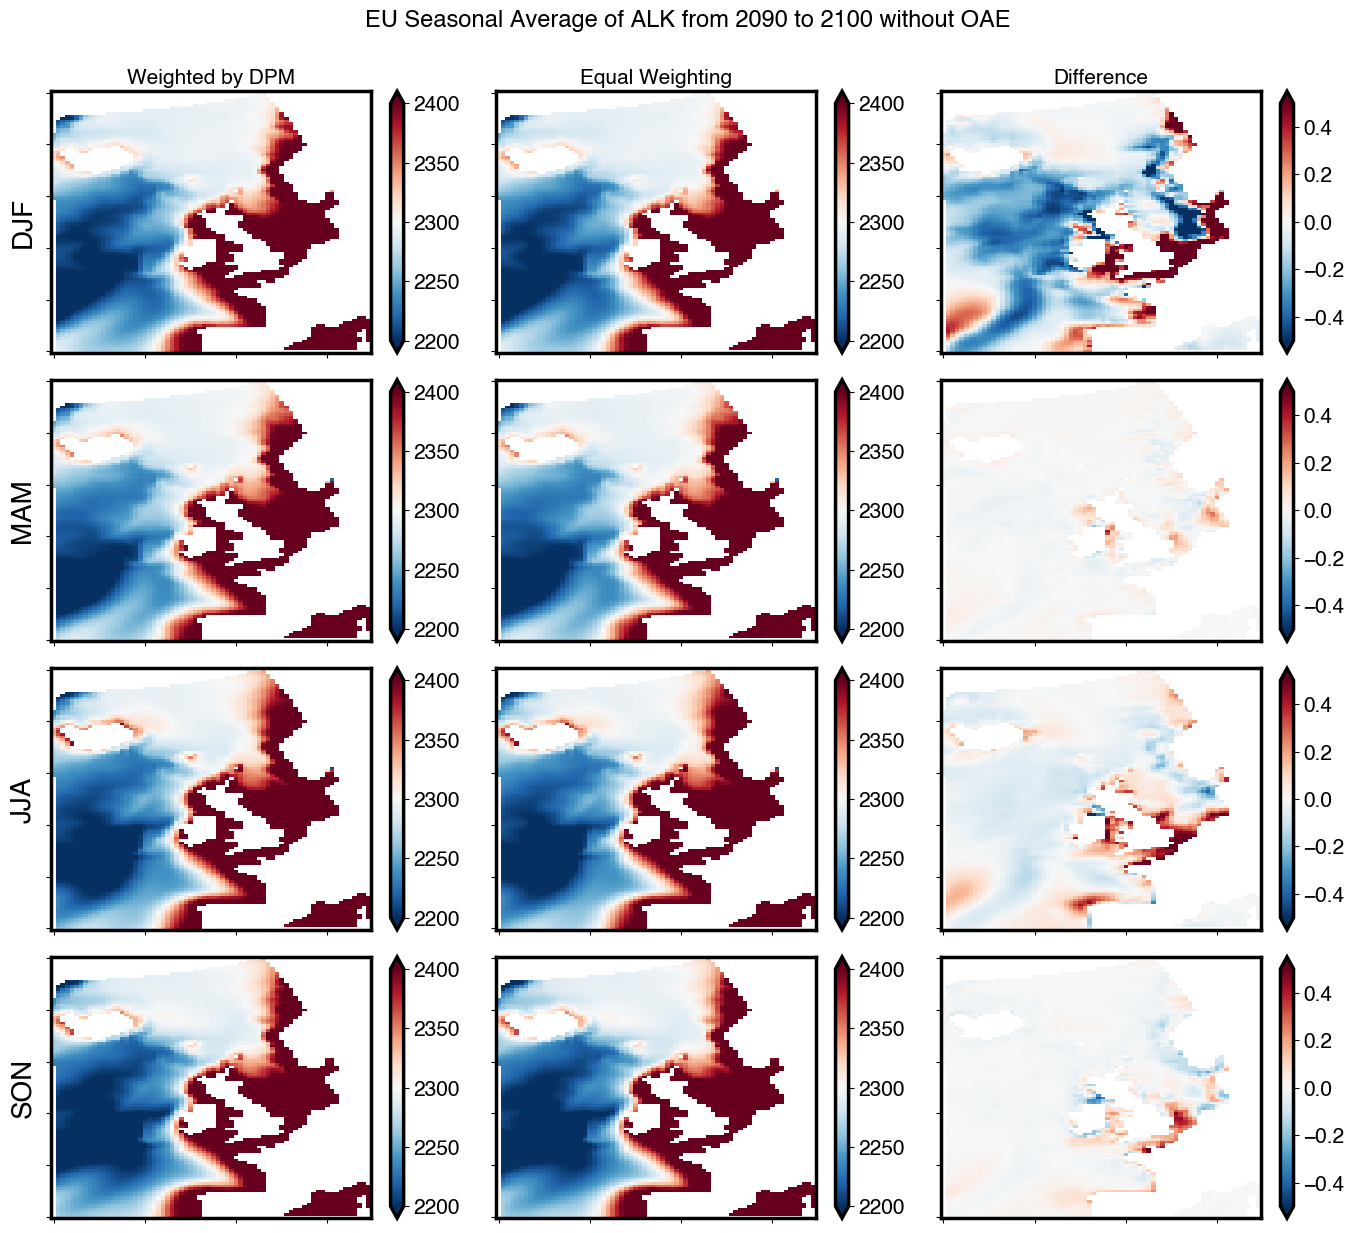

In [49]:
notnull = pd.notnull(ds_unweighted_26["ALK"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_26["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=2200,
        vmax=2400,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_26["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=2200,
        vmax=2400,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_26["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of Alkalinity from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

### EU Seasonal Average of Alkalinity

In [44]:
sliced_frame_70 = sliced_frame_70.ALK.mean(dim=('deptht'))

In [45]:
month_length = sliced_frame_70.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_70 = (sliced_frame_70 * weights).groupby("time_counter.season").sum(dim="time_counter")

In [46]:
ds_unweighted_70 = sliced_frame_70.groupby("time_counter.season").mean("time_counter")
ds_diff_70 = ds_weighted_70 - ds_unweighted_70

In [47]:
ds_weighted_70 = ds_weighted_70.to_dataset(name='ALK')
ds_unweighted_70 = ds_unweighted_70.to_dataset(name='ALK')
ds_diff_70 = ds_diff_70.to_dataset(name='ALK')

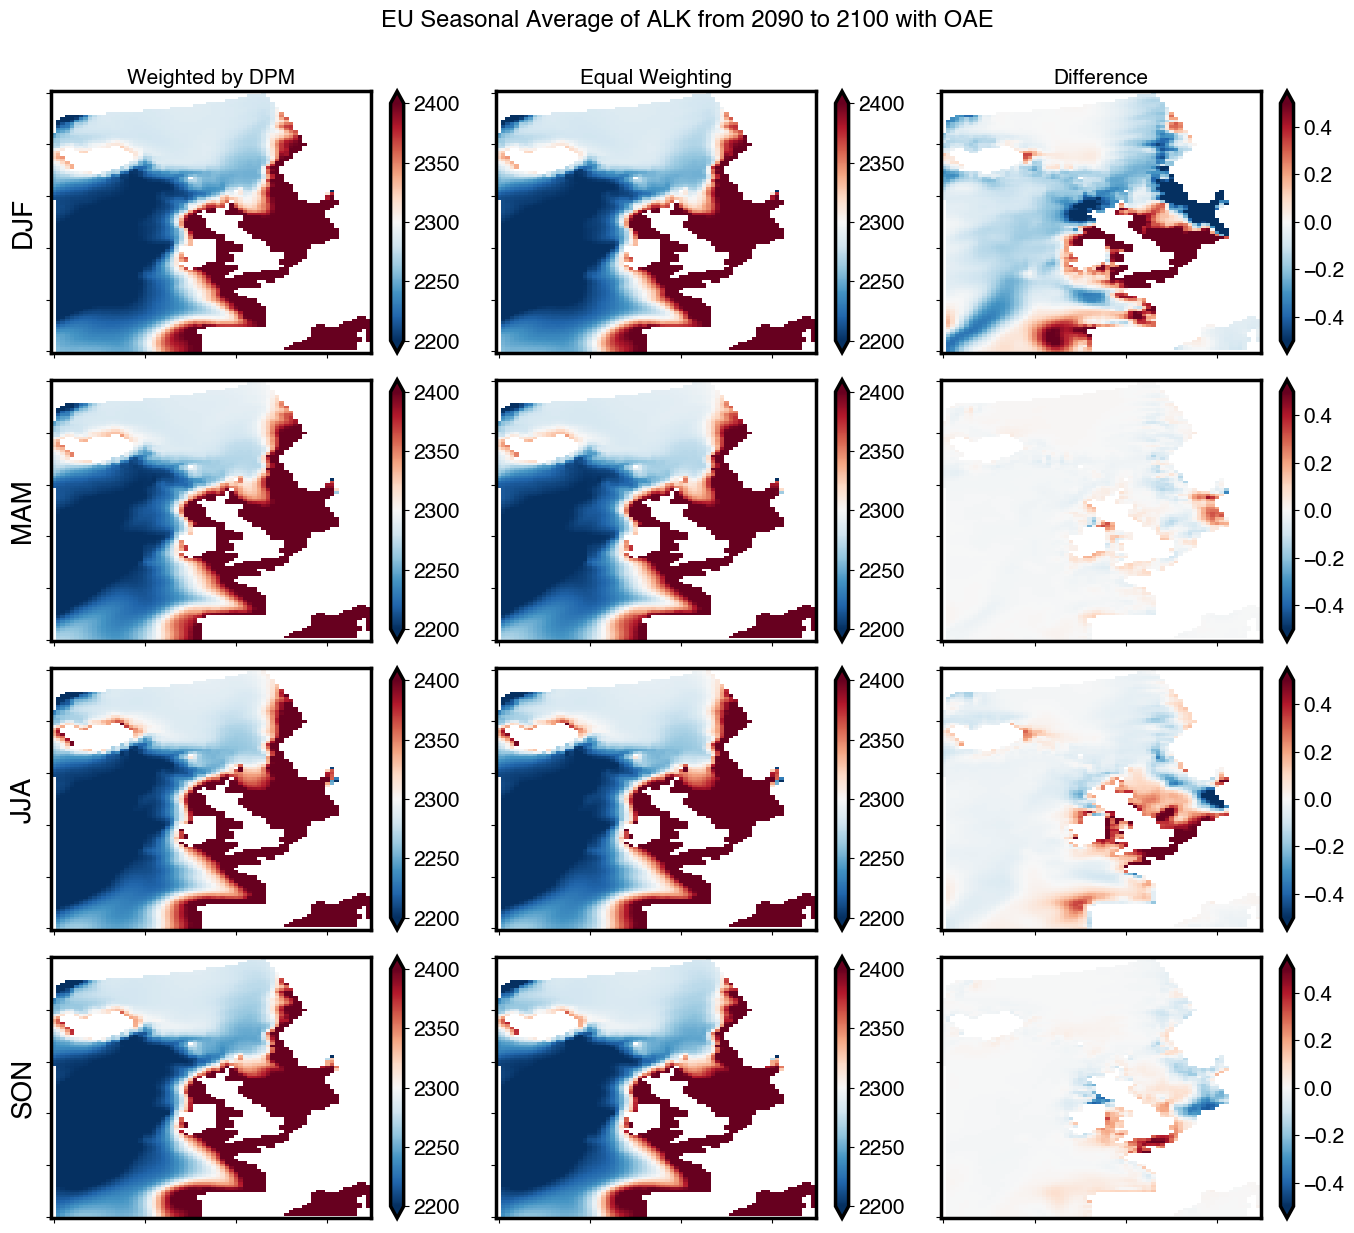

In [50]:
notnull = pd.notnull(ds_unweighted_26["ALK"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_70["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=2200,
        vmax=2400,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_70["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=2200,
        vmax=2400,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_70["ALK"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of Alkalinity from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass

### EU Monthly Average of Alkalinity

In [51]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

alk_26_month = data_26["ALK"].sel(time_counter=slice(start_date_month, end_date_month))
alk_monthly_mean_26 = alk_26_month.groupby('time_counter').mean(["y", "x", "deptht"])

In [52]:
alk_70_month = data_70["ALK"].sel(time_counter=slice(start_date_month, end_date_month))
alk_monthly_mean_70 = alk_70_month.groupby('time_counter').mean(["y", "x", "deptht"])

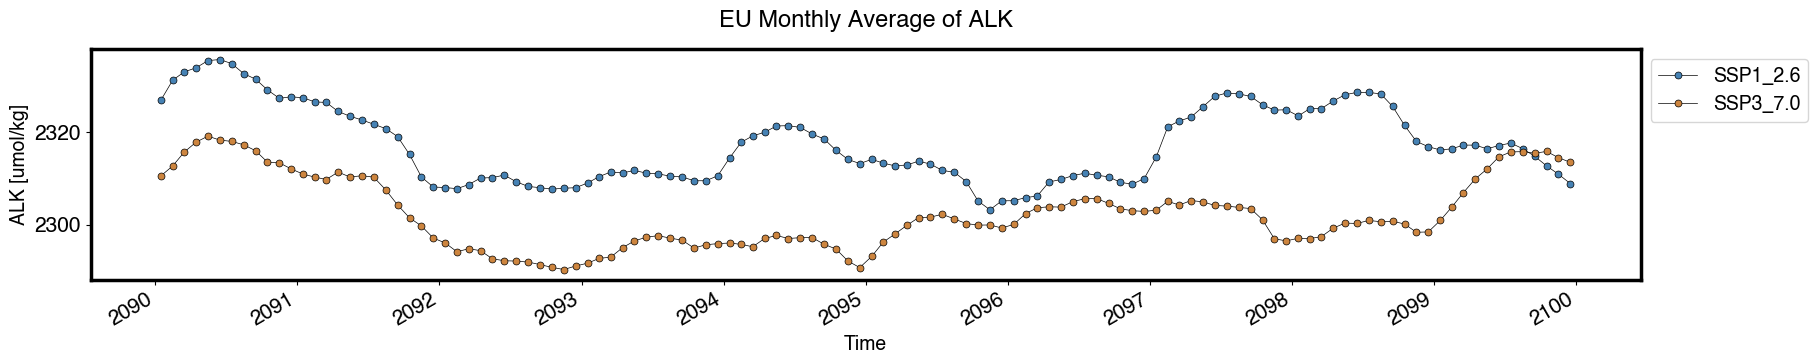

In [53]:
f, ax = plt.subplots(figsize=(20, 3))

alk_monthly_mean_26.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="steelblue", 
                        markeredgecolor="black", 
                        label = 'SSP1_2.6')

alk_monthly_mean_70.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="peru",
                        markeredgecolor="black", 
                        label = 'SSP3_7.0')
ax.set_title("EU Monthly Average of Alkalinity", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("ALK [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of Alkalinity from 2090 to 2100 without OAE

In [54]:
alk_26_monthly = alk_monthly_mean_26.to_dataframe('ALK')
alk_26_monthly['Month'] = pd.DatetimeIndex(alk_26_monthly.index).month

In [55]:
conditions = [
    (alk_26_monthly['Month'] == 1),
    (alk_26_monthly['Month'] == 2),
    (alk_26_monthly['Month'] == 3),
    (alk_26_monthly['Month'] == 4),
    (alk_26_monthly['Month'] == 5),
    (alk_26_monthly['Month'] == 6),
    (alk_26_monthly['Month'] == 7),
    (alk_26_monthly['Month'] == 8),
    (alk_26_monthly['Month'] == 9),
    (alk_26_monthly['Month'] == 10),
    (alk_26_monthly['Month'] == 11),
    (alk_26_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

alk_26_monthly['Month'] = np.select(conditions, values)

In [56]:
colors = dict(zip(alk_26_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

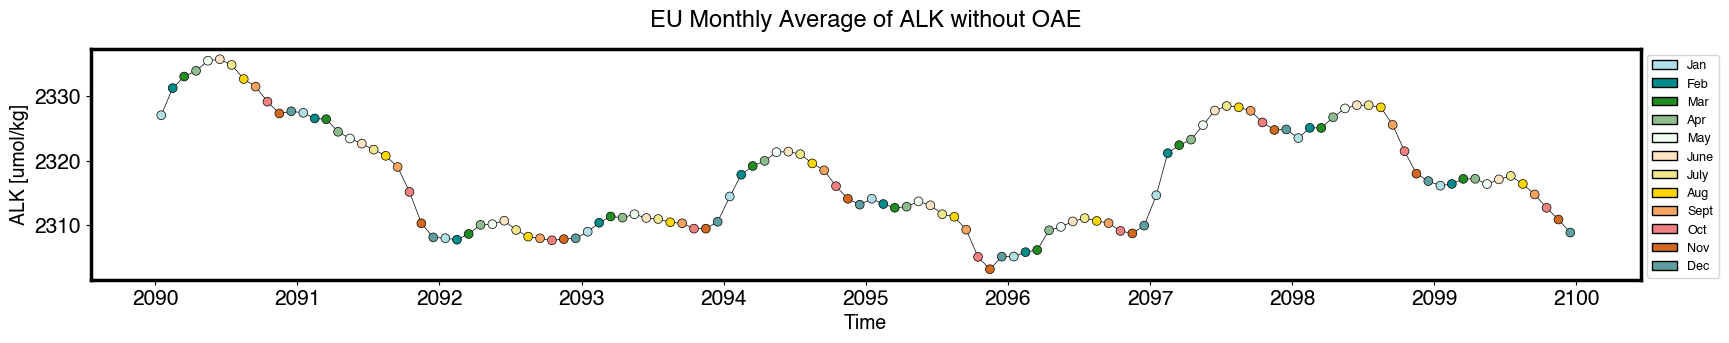

In [57]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_26_monthly.index, alk_26_monthly.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_26_monthly.index, alk_26_monthly.ALK, color=alk_26_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('ALK [umol/kg]', fontsize=14)
ax.set_title("EU Monthly Average of Alkalinity without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of Alkalinity from 2090 to 2100 with OAE

In [58]:
alk_70_monthly = alk_monthly_mean_70.to_dataframe('ALK')
alk_70_monthly['Month'] = pd.DatetimeIndex(alk_70_monthly.index).month

In [59]:
conditions = [
    (alk_70_monthly['Month'] == 1),
    (alk_70_monthly['Month'] == 2),
    (alk_70_monthly['Month'] == 3),
    (alk_70_monthly['Month'] == 4),
    (alk_70_monthly['Month'] == 5),
    (alk_70_monthly['Month'] == 6),
    (alk_70_monthly['Month'] == 7),
    (alk_70_monthly['Month'] == 8),
    (alk_70_monthly['Month'] == 9),
    (alk_70_monthly['Month'] == 10),
    (alk_70_monthly['Month'] == 11),
    (alk_70_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

alk_70_monthly['Month'] = np.select(conditions, values)

In [60]:
colors = dict(zip(alk_70_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

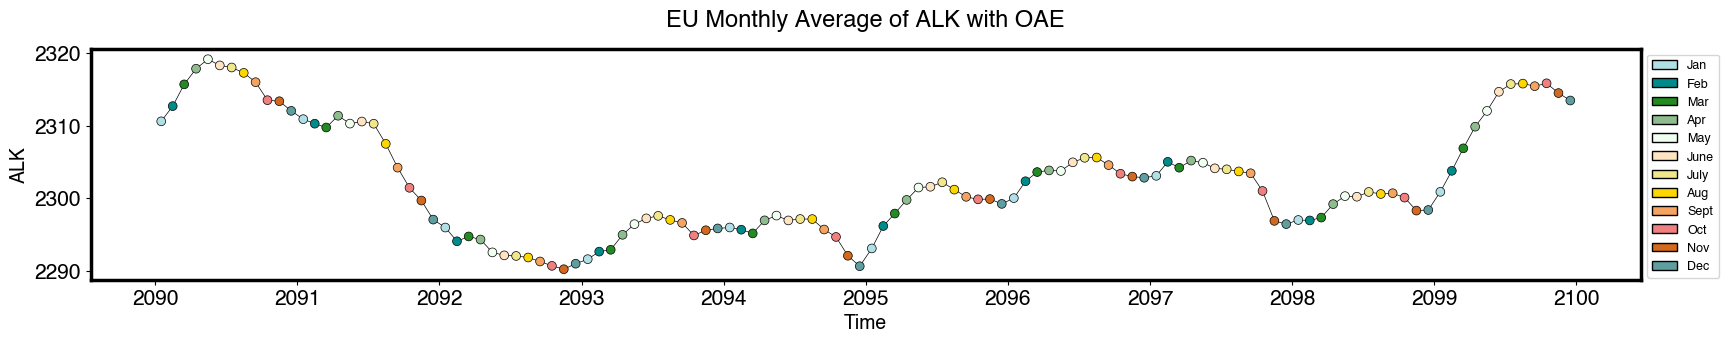

In [61]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_70_monthly.index, alk_70_monthly.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_70_monthly.index, alk_70_monthly.ALK, color=alk_70_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('ALK', fontsize=14)
ax.set_title("EU Monthly Average of Alkalinity with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of Alkalinity

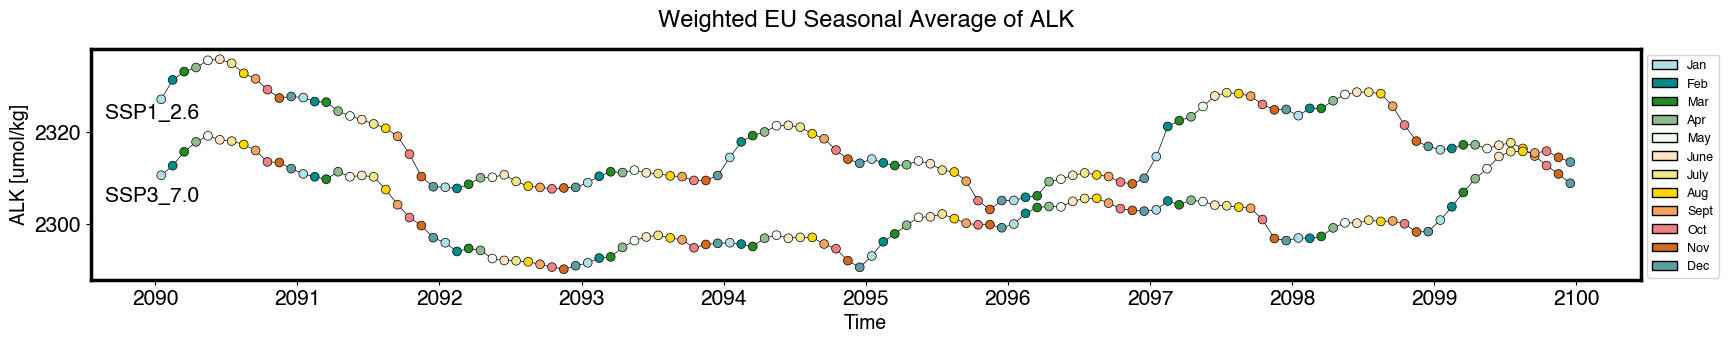

In [64]:
colors = dict(zip(alk_26_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(alk_26_monthly.index, alk_26_monthly.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43700, 2305, s='SSP3_7.0')
ax.scatter(alk_26_monthly.index, alk_26_monthly.ALK, color=alk_26_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(alk_70_monthly.index, alk_70_monthly.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43700, 2323, s='SSP1_2.6')
ax.scatter(alk_70_monthly.index, alk_70_monthly.ALK, color=alk_70_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('ALK [umol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity", fontsize=17, y=1.06)

#plt.savefig('EUalk_monthly_mean.png')

pass

### Δ Alkalinity between SSP1_2.6 and SSP3_7.0

In [71]:
delta_ALK = alk_70_monthly.ALK - alk_26_monthly.ALK

In [66]:
delta_ALK = delta_ALK.to_xarray()

In [67]:
delta_ALK = delta_ALK.to_dataframe('ALK')
delta_ALK['Month'] = pd.DatetimeIndex(delta_ALK.index).month

In [68]:
conditions = [
    (delta_ALK['Month'] == 1),
    (delta_ALK['Month'] == 2),
    (delta_ALK['Month'] == 3),
    (delta_ALK['Month'] == 4),
    (delta_ALK['Month'] == 5),
    (delta_ALK['Month'] == 6),
    (delta_ALK['Month'] == 7),
    (delta_ALK['Month'] == 8),
    (delta_ALK['Month'] == 9),
    (delta_ALK['Month'] == 10),
    (delta_ALK['Month'] == 11),
    (delta_ALK['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_ALK['Month'] = np.select(conditions, values)

In [69]:
colors = dict(zip(delta_ALK.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

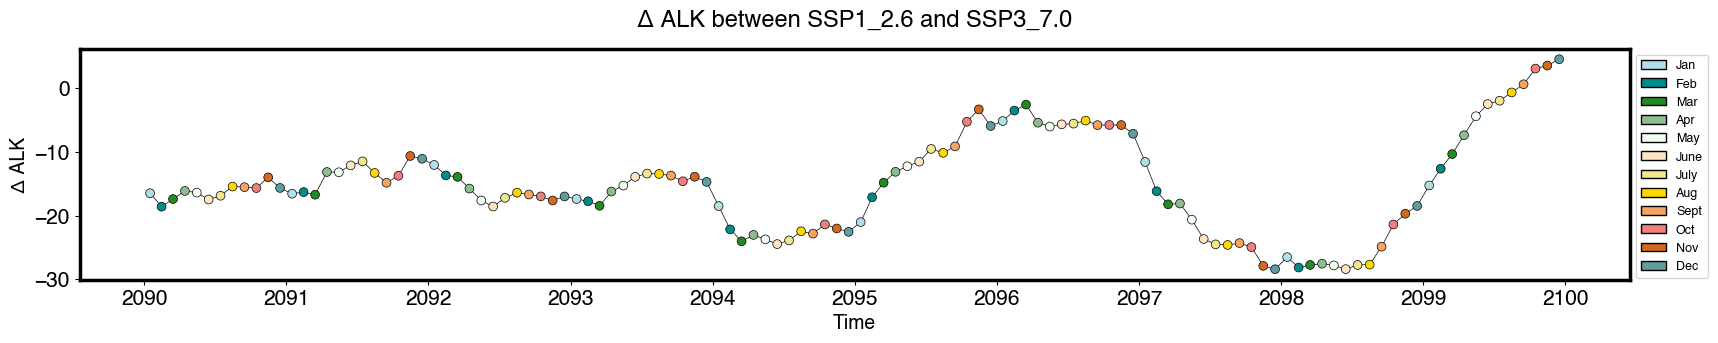

In [70]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_ALK.index, delta_ALK.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_ALK.index, delta_ALK.ALK, color=delta_ALK.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ Alkalinity', fontsize=14)
ax.set_title("Δ Alkalinity between SSP1_2.6 and SSP3_7.0", fontname="Helvetica", fontsize=17, y=1.06)

#plt.savefig('EUalk_Δ.png')

pass